In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt

In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
with open('../dataset/BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('../dataset/BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
    
# sk 데이터
sk_age = sk_data['SK_AGE']
sk_time = sk_data['SK_TIME']

# sh 데이터
sh_resident = sh_data['SH_RESIDENT']
sh_foreign = sh_data['SH_FOREIGN']

* [SCORE](#SCORE)
* [sk](#sk)
* [sh](#sh)
* [corr](#corr-함수)
* [main](#main)
* [scatter plot](#scatter-plot)

## Score

In [92]:
formula_1= pd.read_csv('../dataset/score/wordcloud_formula1.csv')
covid_all= pd.read_excel('../dataset/COVID/all_covid.xlsx')
event_score= pd.read_csv('../dataset/score/covid_event_score.csv')

formula_1.rename(columns= {'Unnamed: 0': 'DATE'}, inplace=True)
event_score.rename(columns= {'Unnamed: 0': 'DATE', 'Unnamed: 3': '사건명세'}, inplace=True)

In [98]:
# 데이터타입 맞추기
formula_1.DATE= formula_1.DATE.astype('datetime64')
event_score.DATE= event_score.DATE.astype('datetime64')
event_score.small= event_score.small.astype('int64')

In [99]:
# 확진자수, 사건해당횟수, 사건지속기간 추가
event_score= pd.merge(event_score, formula_1, on = 'DATE')

# SCORE

In [235]:
# covid interval 추가
# 상위 50퍼센트 미만: 0명 - 27명 1점
# 상위 50퍼센트 이상 20퍼센트 미만: 28명 - 107명 3점
# 상위 20퍼센트 이상 10퍼센트 미만: 108명 - 242명 6점
# 상위 10퍼센트 이상 5퍼센트 미만: 243명 - 505명 10점
# 상위 5퍼센트 이상: 506명 - 15점
event_score['covid_interval'] = pd.qcut(event_score.확진자수, [0,0.5,0.8,0.9,0.95,1], labels= [1,3,6,10,15])
event_score.covid_interval = event_score.covid_interval.astype('int64')

In [273]:
# Scoring
event_score['SCORE'] = (10*event_score['covid_interval'] + 10*event_score['big'] + 5*event_score['small'])

In [272]:
event_score

,DATE,big,small,사건명세,확진자수,사건해당횟수,사건지속기간,covid_interval,SCORE,YO
0,2020-02-01,0,0,NaN,1,0,0.000000,1,10,5
1,2020-02-02,0,0,NaN,3,0,0.000000,1,10,6
2,2020-02-03,0,0,NaN,0,0,0.000000,1,10,0
3,2020-02-04,0,0,NaN,1,0,0.000000,1,10,1
4,2020-02-05,0,1,구리시 최초확진,3,0,0.000000,1,15,2
5,2020-02-06,0,1,gs홈쇼핑 확진,4,0,0.000000,1,15,3
6,2020-02-07,0,0,NaN,1,0,0.000000,1,10,4
7,2020-02-08,0,0,NaN,0,0,0.000000,1,10,5
8,2020-02-09,0,0,NaN,3,0,0.000000,1,10,6
9,2020-02-10,0,0,NaN,0,0,0.000000,1,10,0


In [108]:
# 요일 추가
event_score['YO'] = event_score['DATE'].map(lambda x: x.weekday())

In [274]:
# 월요일
event_score_mon= event_score.query('YO==0')

# 화요일
event_score_tue= event_score.query('YO==1')

# 수요일
event_score_wed= event_score.query('YO==2')

# 목요일
event_score_thu= event_score.query('YO==3')

# 금요일
event_score_fri= event_score.query('YO==4')

# 토요일
event_score_sat= event_score.query('YO==5')

# 일요일
event_score_sun= event_score.query('YO==6')

#### sk

In [112]:
# 유동인구 일별 그래프
def sksk(df, flag, code):
    
    if flag:
        sk_s = df.query('(SI_CODE==@code)')
    else:
        sk_s = df
        
    age_col_list = sk_s.columns.values.tolist()
    age_col_list = age_col_list[7:22]

    temp_df = pd.DataFrame(sk_s.groupby(['DATE'])[age_col_list].sum())
    temp_df = temp_df.sum(axis=1)
    temp_df = temp_df.to_frame(name='Popul')
    pop_df = temp_df.reset_index()
    pop_df['YO'] = pop_df['DATE'].map(lambda x: x.weekday())
    
    # 2020년만 해당하도록 함
    pop_20 = pop_df.tail(121)
    
    # 그래프 보고싶으면 주석처리 빼기
#     draw(pop_20, 'DATE', 'Popul')
    
    return pop_20

#### sh

In [113]:
# 매출액 일별 그래프
def shsh(df, flag, code):
    
    if flag:
        sh_s = df.query('(SI_CODE==@code)')
    else:
        sh_s = df
    
    temp_df = pd.DataFrame(sh_s.groupby(['DATE'])['USE_AMT'].sum())
    amt_df = temp_df.reset_index()
    amt_df['YO'] = amt_df['DATE'].map(lambda x: x.weekday())
    
    # 2020년만 해당하도록 함
    amt_20 = amt_df.tail(121)
    
    # 그래프 보고싶으면 주석처리 빼기
#     draw(amt_20, 'DATE', 'USE_AMT')
    
    return amt_20

In [114]:
def draw(df, x_col, y_col):
    label = df[x_col]
    index = range(len(label))

    plt.figure(figsize=(30,10))
    plt.plot(index, df[y_col], '>-')
    plt.xticks(index[::7], label[::7], rotation='45')
    plt.grid(axis='x')
    plt.show()

#### corr 함수

In [174]:
def corr(dataframe, sk_dataframe, sh_dataframe, title):
    
    # Series로 넣는 경우는 .tolist()가 필요
    # list로 넣는경우는 .tolist() 삭제
    origin = pd.DataFrame({'covid':dataframe.tolist(), 'pop':sk_dataframe.tolist(), 'amt':sh_dataframe.tolist()})
    origin_df = origin.corr()

    plt.figure(figsize=(8,8))

    mask = np.zeros_like(origin_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(origin_df, annot=True, fmt = '.2f', linewidths=.5, cmap='RdYlBu_r', mask=mask, annot_kws={"fontsize":15})
    plt.title(title)
    plt.show()

### main

In [116]:
# 유동인구 

# 2020년 전체(서울+대구)
total_sk = sksk(sk_age, False, '00')

# 2020년 서울
seoul_sk = sksk(sk_age, True, '11')

# 2020년 대구
daegu_sk = sksk(sk_age, True, '27')

In [117]:
# 매출액

# 2020년 전체(서울+대구)
total_sh = shsh(sh_resident, False, '00')

# 2020년 서울
seoul_sh = shsh(sh_resident, True, '11')

# 2020년 대구
daegu_sh = shsh(sh_resident, True, '27')

In [127]:
# 전체 유동인구
# 월요일
total_sk_mon= total_sk.query('YO==0')
# 화요일
total_sk_tue= total_sk.query('YO==1')
# 수요일
total_sk_wed= total_sk.query('YO==2')
# 목요일
total_sk_thu= total_sk.query('YO==3')
# 금요일
total_sk_fri= total_sk.query('YO==4')
# 토요일
total_sk_sat= total_sk.query('YO==5')
# 일요일
total_sk_sun= total_sk.query('YO==6')

In [128]:
# 전체 매출액
# 월요일
total_sh_mon= total_sh.query('YO==0')
# 화요일
total_sh_tue= total_sh.query('YO==1')
# 수요일
total_sh_wed= total_sh.query('YO==2')
# 목요일
total_sh_thu= total_sh.query('YO==3')
# 금요일
total_sh_fri= total_sh.query('YO==4')
# 토요일
total_sh_sat= total_sh.query('YO==5')
# 일요일
total_sh_sun= total_sh.query('YO==6')

# 요일별 Heatmap

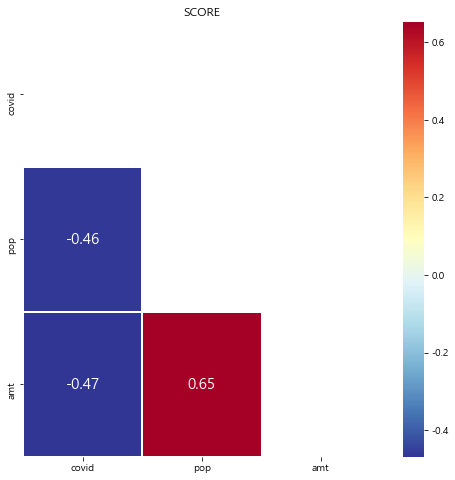

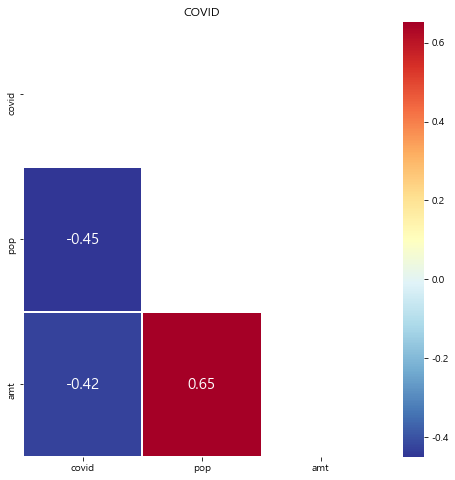

In [275]:
# 전체
corr(event_score['SCORE'], total_sk['Popul'], total_sh['USE_AMT'], 'SCORE')
corr(event_score['확진자수'], total_sk['Popul'], total_sh['USE_AMT'], 'COVID')

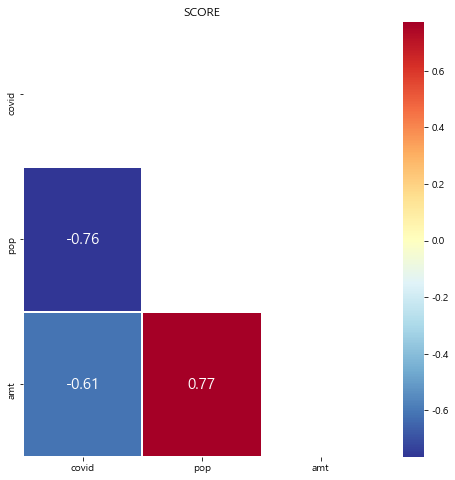

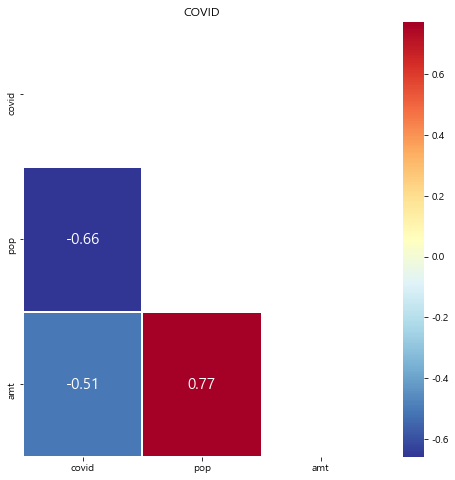

In [276]:
# 월요일
corr(event_score_mon['SCORE'], total_sk_mon['Popul'], total_sh_mon['USE_AMT'], 'SCORE')
corr(event_score_mon['확진자수'], total_sk_mon['Popul'], total_sh_mon['USE_AMT'], 'COVID')

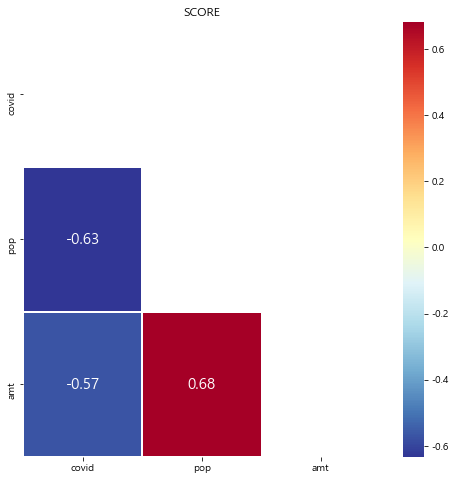

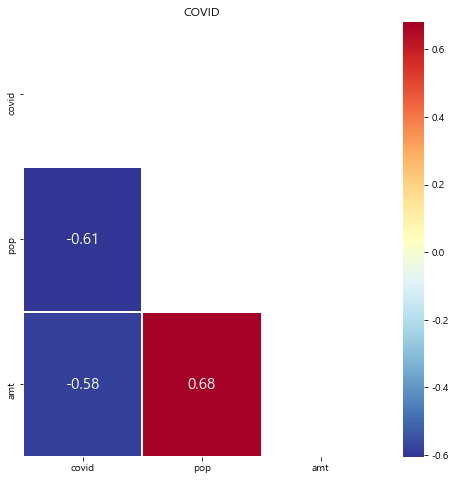

In [277]:
# 화요일
corr(event_score_tue['SCORE'], total_sk_tue['Popul'], total_sh_tue['USE_AMT'], 'SCORE')
corr(event_score_tue['확진자수'], total_sk_tue['Popul'], total_sh_tue['USE_AMT'], 'COVID')

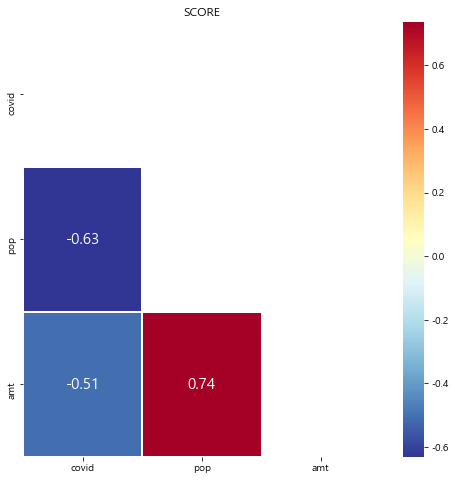

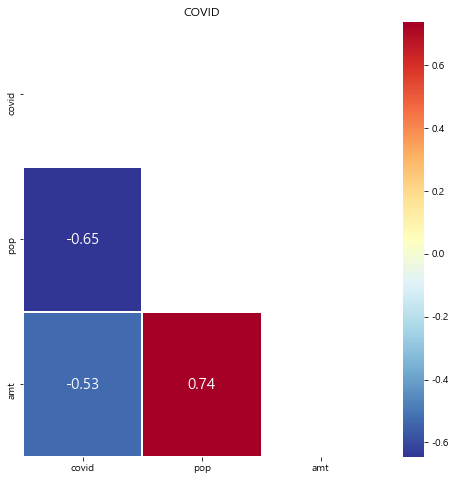

In [278]:
# 수요일
corr(event_score_wed['SCORE'], total_sk_wed['Popul'], total_sh_wed['USE_AMT'], 'SCORE')
corr(event_score_wed['확진자수'], total_sk_wed['Popul'], total_sh_wed['USE_AMT'], 'COVID')

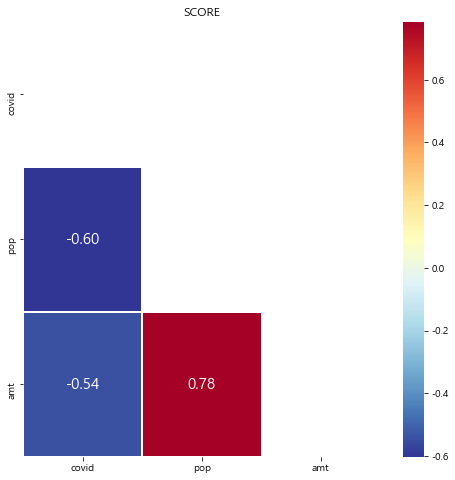

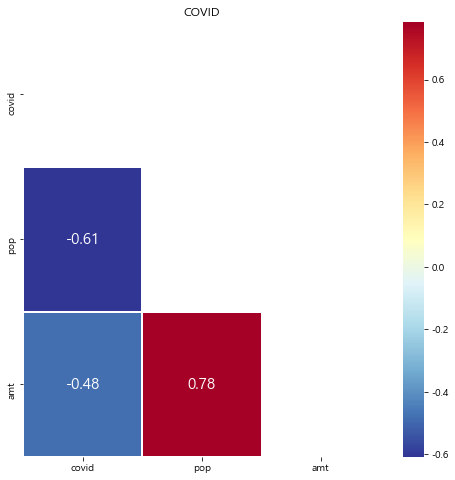

In [279]:
# 목요일
corr(event_score_thu['SCORE'], total_sk_thu['Popul'], total_sh_thu['USE_AMT'], 'SCORE')
corr(event_score_thu['확진자수'], total_sk_thu['Popul'], total_sh_thu['USE_AMT'], 'COVID')

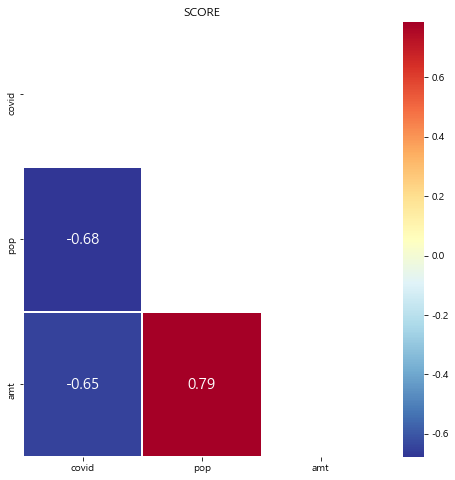

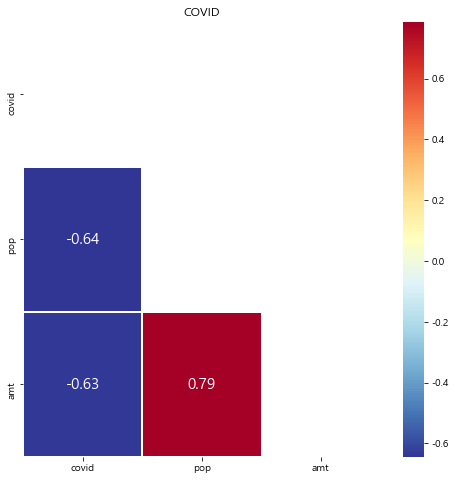

In [280]:
# 금요일
corr(event_score_fri['SCORE'], total_sk_fri['Popul'], total_sh_fri['USE_AMT'], 'SCORE')
corr(event_score_fri['확진자수'], total_sk_fri['Popul'], total_sh_fri['USE_AMT'], 'COVID')

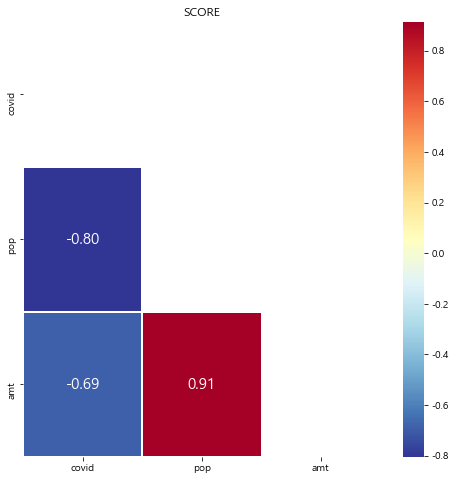

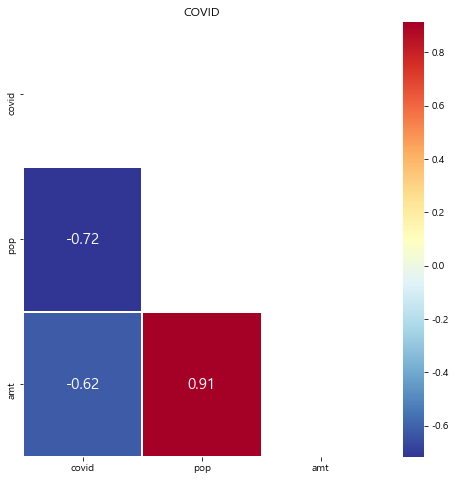

In [281]:
# 토요일
corr(event_score_sat['SCORE'], total_sk_sat['Popul'], total_sh_sat['USE_AMT'], 'SCORE')
corr(event_score_sat['확진자수'], total_sk_sat['Popul'], total_sh_sat['USE_AMT'], 'COVID')

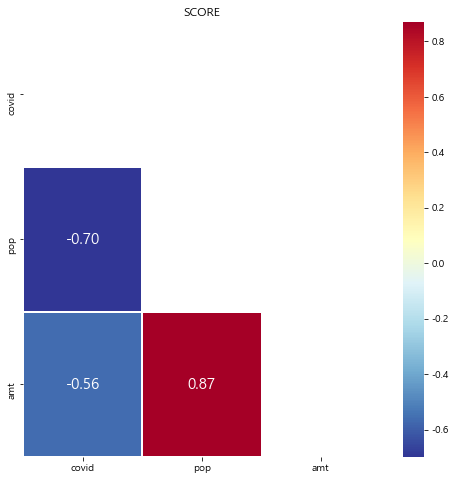

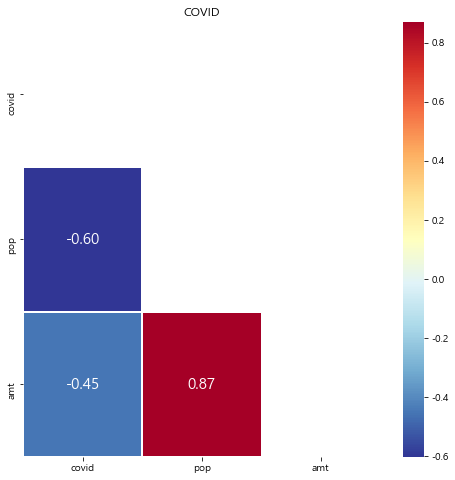

In [282]:
# 일요일
corr(event_score_sun['SCORE'], total_sk_sun['Popul'], total_sh_sun['USE_AMT'], 'SCORE')
corr(event_score_sun['확진자수'], total_sk_sun['Popul'], total_sh_sun['USE_AMT'], 'COVID')

#### scatter plot

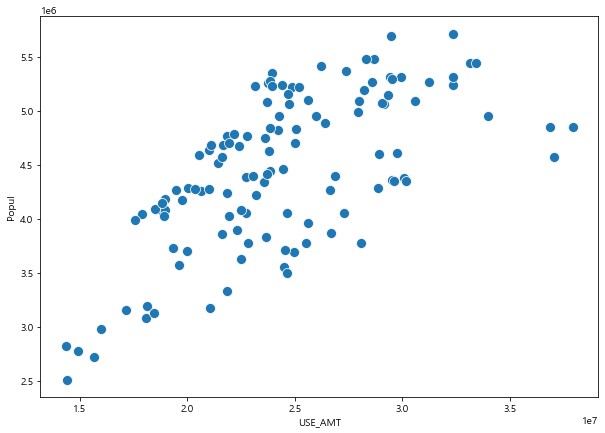

In [102]:
def scatter(df1, df2, x_col, y_col):
    plt.figure(figsize=(10,7))
    df1['DATE'] = df1['DATE'].astype(str)
    df2['DATE'] = df2['DATE'].astype(str)
    
    sns.scatterplot(x=x_col, 
                    y=y_col, 
                    s=100, # marker size
                    data = pd.merge(df1, df2, on='DATE'))

    plt.show()

scatter(total_sh, total_sk, 'USE_AMT', 'Popul')